In [56]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import os
from Dataset.MakeDataset import X,y
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [47]:
# X.shape, y.shape
def label(x):
    dict1 = {1:"WALKING",2:"WALKING_UPSTAIRS",3:"WALKING_DOWNSTAIRS",4:"SITTING",5:"STANDING",6:"LAYING"}
    return dict1[x]
# y = y.apply(label)
# y
# X = X.reshape(180,-1)
X.shape
# X[[[0]]].shape
# X = X[:,1,:]
X = X.mean(axis=1)
# X= X.reshape(180,500)
# y = label(y)
y_labels = []
for i in range(len(y)):
    y_labels.append(label(y[i]))
# X.shape

# print(100*X.var(axis=1)/X.mean(axis=1)).shape


In [48]:
X_1 = X[:,0]
Y_1 = X[:,1]
Z_1 = X[:,2]

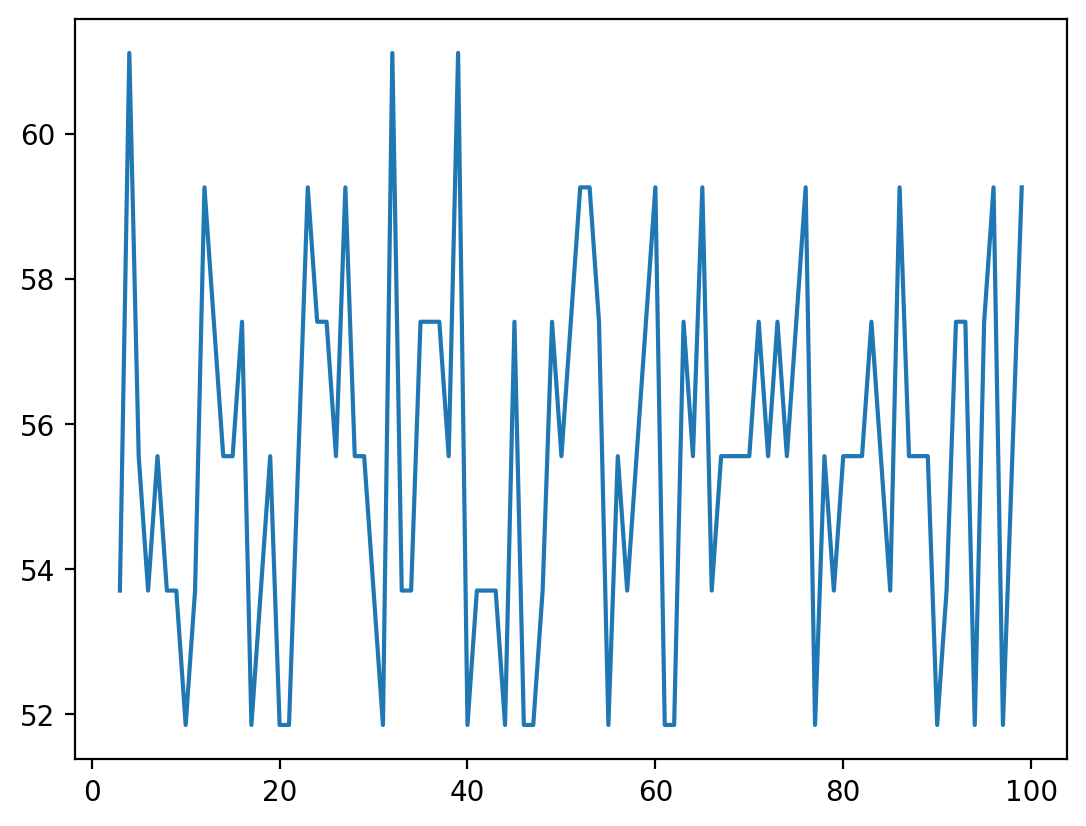

In [53]:
X_list = []
y_list = []

for i in range(3,100):
    X_list.append(i)
    dt = DecisionTreeClassifier(criterion='gini', max_depth=i)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=20,stratify=y)
    # X_train.shape
    dt.fit(X_train, y_train)
    y_predicted = dt.predict(X_test)
    y_predicted
    y_predicted = pd.DataFrame({'Label':y_predicted})
    accuracy = len(y_predicted[y_predicted['Label']==y_test])/len(y_test)
    y_list.append(accuracy*100)

plt.plot(X_list, y_list)
plt.show()


In [50]:
print(max(y_list))

61.111111111111114


In [58]:
# Install TSFEL if not already installed
# !pip install tsfel

import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Assuming X has shape (180, 500, 3)

# Define an empty DataFrame to store extracted features
import pandas as pd
features_df = pd.DataFrame()
cfg = tsfel.get_features_by_domain()
# Extract features for each axis (X, Y, Z) separately and concatenate
for i in range(X.shape[0]):
    # Extract features for each axis
    tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])
                                for j in range(X.shape[2])], axis=1)
    
    # Append to the features DataFrame
    features_df = pd.concat([features_df, tsfel_features], ignore_index=True)

# Convert features DataFrame to numpy array
X_features = features_df.to_numpy()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
*** Feature extraction started ***


/var/folders/kn/9gqwdgkj59zg8_vc_s8h33200000gn/T/ipykernel_7372/3456931129.py:18: UserWarning: Using default sampling frequency set in configuration file.
  tsfel_features = pd.concat([tsfel.time_series_features_extractor(cfg, X[i, :, j])



*** Feature extraction finished ***
Accuracy: 0.7222
Precision: 0.7523
Recall: 0.7222
Confusion Matrix:
[[4 1 1 0 0 0]
 [1 4 2 0 0 0]
 [0 1 2 0 0 0]
 [0 0 0 5 1 0]
 [0 0 0 3 5 0]
 [0 0 0 0 0 6]]


In [59]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7222
Precision: 0.7523
Recall: 0.7222
Confusion Matrix:
[[4 1 1 0 0 0]
 [1 4 2 0 0 0]
 [0 1 2 0 0 0]
 [0 0 0 5 1 0]
 [0 0 0 3 5 0]
 [0 0 0 0 0 6]]
